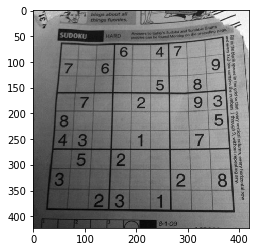

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils import Threshold, Histogram

img = Image.open("./res/dave.jpg").convert("L")
img = np.asarray(img)

plt.imshow(img, cmap="gray")

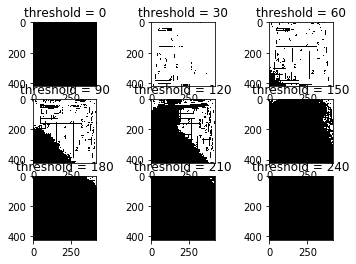

In [6]:
interval = 30
num_plots = 255/interval + 1
plot_width = 3
idx = 1

for i in range(0, 255, interval):
    plt.subplot(num_plots/3, 3, idx)
    th_img = Threshold(img,th=i)
    plt.title("threshold = "+str(i))
    plt.imshow(th_img, cmap="gray")
    idx += 1

<BarContainer object of 256 artists>

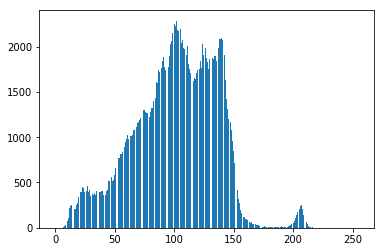

In [89]:
plt.bar(np.arange(0, 256), Histogram(img))

In [109]:
def otsuThreshold(img):
    
    if type(img) is not np.ndarray:
        raise AssertionError("img is not ndarray")
    
    hist = Histogram(img)
    
    vars_within = []
    vars_between = []

    zero = 1.e-17
    for t in range(0, 256):
        sumb = np.sum(hist[:t]) + zero
        sumw = np.sum(hist[t:]) + zero
        sum = sumb + sumw
        wb = sumb/sum
        ww = sumw/sum
        
        mub = zero
        muw = zero
        for i in range(0, t):
            mub += i * hist[i]/sumb
        for i in range(t, 256):
            muw += i * hist[i]/sumw

        vb = zero
        vw = zero
        for i in range(0, t):
            vb += hist[i] * ((i - mub)**2)/sumb
        for i in range(t, 256):
            vw += hist[i] * ((i - muw)**2)/sumw
    
        var_within = wb * vb + ww * vw
        vars_within.append(var_within)


    th = vars_within.index(min(vars_within))
    print(th)
    res = Threshold(img, th)
    return res

res = otsuThreshold(img)

96


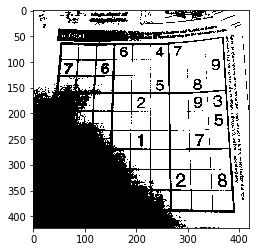

In [110]:
plt.imshow(res, cmap="gray")

In [57]:
min(th)

237337975.15179205

In [58]:
def threshold_otsu(image=None, nbins=256, *, hist=None):
    if image is not None and image.ndim > 2 and image.shape[-1] in (3, 4):
        msg = "thoreshold_otsu is expedted to work correctly only for"\
            "grayscale image"
        warn(msg.format(image.shape))
    
    if image is not None:
        first_pixel = image.ravel()[0]
        if np.all(image == first_pixel):
            return first_pixel
        
    counts, bin_centers = image_histogram(image, nbins)
    
    weight1 = np.cumsum(counts)
    weight2 = np.cumsum(counts[::-1])[::-1]
    
    mean1 = np.cumsum(counts*bin_centers)/weight1
    mean2 = np.cumsum((counts* bin_centers)[::-1]/weight2[::-1])
    
    variance12 = weight1[:-1]*weight2[1:] * (mean1[:-1] - mean2[1:])**2
    
    idx = np.argmax(variance12)
    threshold = bin_centers[idx]
    return threshold

237717383.6523228